In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df = pd.read_csv('/Users/haricharan/Downloads/clustering/dataset/few ext.csv')
df.head(2)


Unnamed: 0 Vehicle No SENSOR_ID  I Batt High (A)  I Batt Low (A)  SOH COR  \
0           0   TRN18001        S1            -0.50          -0.005     99.0   
1           1   TRN18001        S2            -0.34           0.011    104.0   

   Voltage (V)  I_Batt_Total  SOC (%)     Ri  SOH SUL  SOH_LAM  \
0       12.778        -0.505     80.0  3.187     91.0     77.0   
1       12.778        -0.329     83.0  2.937     87.0     84.0   

   Temperature (°C)  SOC (%).1  
0              27.0       80.0  
1              30.0       83.0

In [5]:
df.drop('Unnamed: 0' , axis=1, inplace = True)
vehicleno=df['Vehicle No']
sensorid=df['SENSOR_ID']
df.drop('Vehicle No' , axis=1, inplace = True)
df.drop('SENSOR_ID' , axis=1, inplace = True)

In [6]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

P1        P2
0  0.691740  0.433266
1  0.480321  0.445232

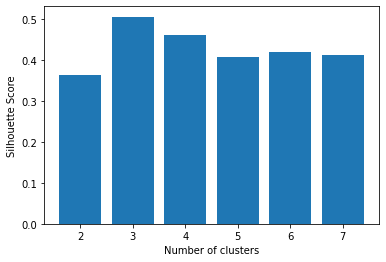

In [13]:
silhouette_scores = [] 

for n_components in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal,GaussianMixture(n_components = n_components).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [14]:
max_value = max(silhouette_scores)
max_index =  silhouette_scores.index(max_value)
print(k[max_index])

3


In [15]:
gmm = GaussianMixture(n_components = k[max_index]) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

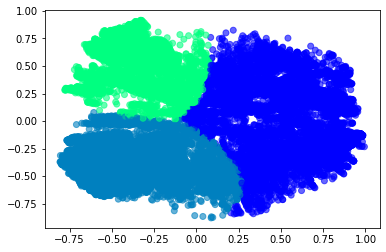

In [17]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = k[max_index]).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 